In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sn
import matplotlib.pyplot as pt
from sklearn.model_selection import cross_val_score , GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures 
import statsmodels.formula.api as smf
import statsmodels.api as sm


df= pd.read_csv(r"C:\Users\senth\OneDrive\Desktop\data\linear regresstion data set\data set for regression\admission_predict.csv")

In [2]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df=df.drop('Serial No.',axis= 1)

In [6]:
df=df.rename(columns=({'GRE Score':'GRE_Score',
                       'TOEFL Score':'TOEFL_Score',
                       'University Rating':'University_Rating',
                       'SOP':'Statement_of_Purpose',
                       'LOR ':'Latter_of_recom',
                       'Chance of Admit ':'Chance_of_Admit'}))

In [7]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'Statement_of_Purpose',
       'Latter_of_recom', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [8]:
continuos=['GRE_Score', 
           'TOEFL_Score', 
           'University_Rating', 
           'Statement_of_Purpose',
           'LOR ', 'CGPA', 
           'Research',
           'Chance of Admit ']

In [9]:
independent_variables= ['GRE_Score', 
                        'TOEFL_Score', 
                        'University_Rating', 
                        'Statement_of_Purpose',
                        'LOR ', 
                        'CGPA',
                        'Research']
dependent_variable=['Chance of Admit ']

In [10]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,Statement_of_Purpose,Latter_of_recom,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# data preprocessing

In [11]:
df.isnull().sum()

GRE_Score               0
TOEFL_Score             0
University_Rating       0
Statement_of_Purpose    0
Latter_of_recom         0
CGPA                    0
Research                0
Chance_of_Admit         0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['University_Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [14]:
df['Statement_of_Purpose'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [15]:
df['Research'].unique()

array([1, 0], dtype=int64)

In [16]:
df['Chance_of_Admit'].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

In [17]:
df['Latter_of_recom'].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [18]:
df['GRE_Score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

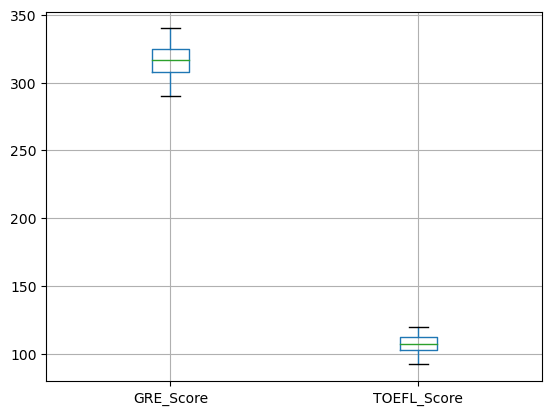

In [19]:
df.boxplot(column=['GRE_Score','TOEFL_Score'])
pt.show()

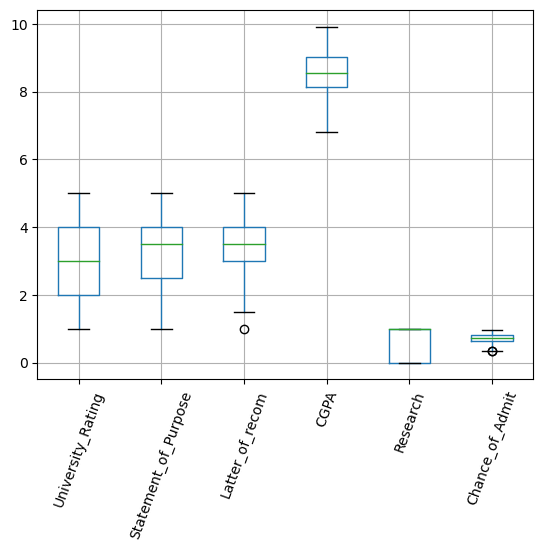

In [20]:
df.boxplot(column=['University_Rating', 'Statement_of_Purpose','Latter_of_recom', 'CGPA', 'Research', 'Chance_of_Admit'])
pt.xticks(rotation=70)
pt.show()

In [21]:
df.skew()

GRE_Score              -0.039842
TOEFL_Score             0.095601
University_Rating       0.090295
Statement_of_Purpose   -0.228972
Latter_of_recom        -0.145290
CGPA                   -0.026613
Research               -0.242475
Chance_of_Admit        -0.289966
dtype: float64

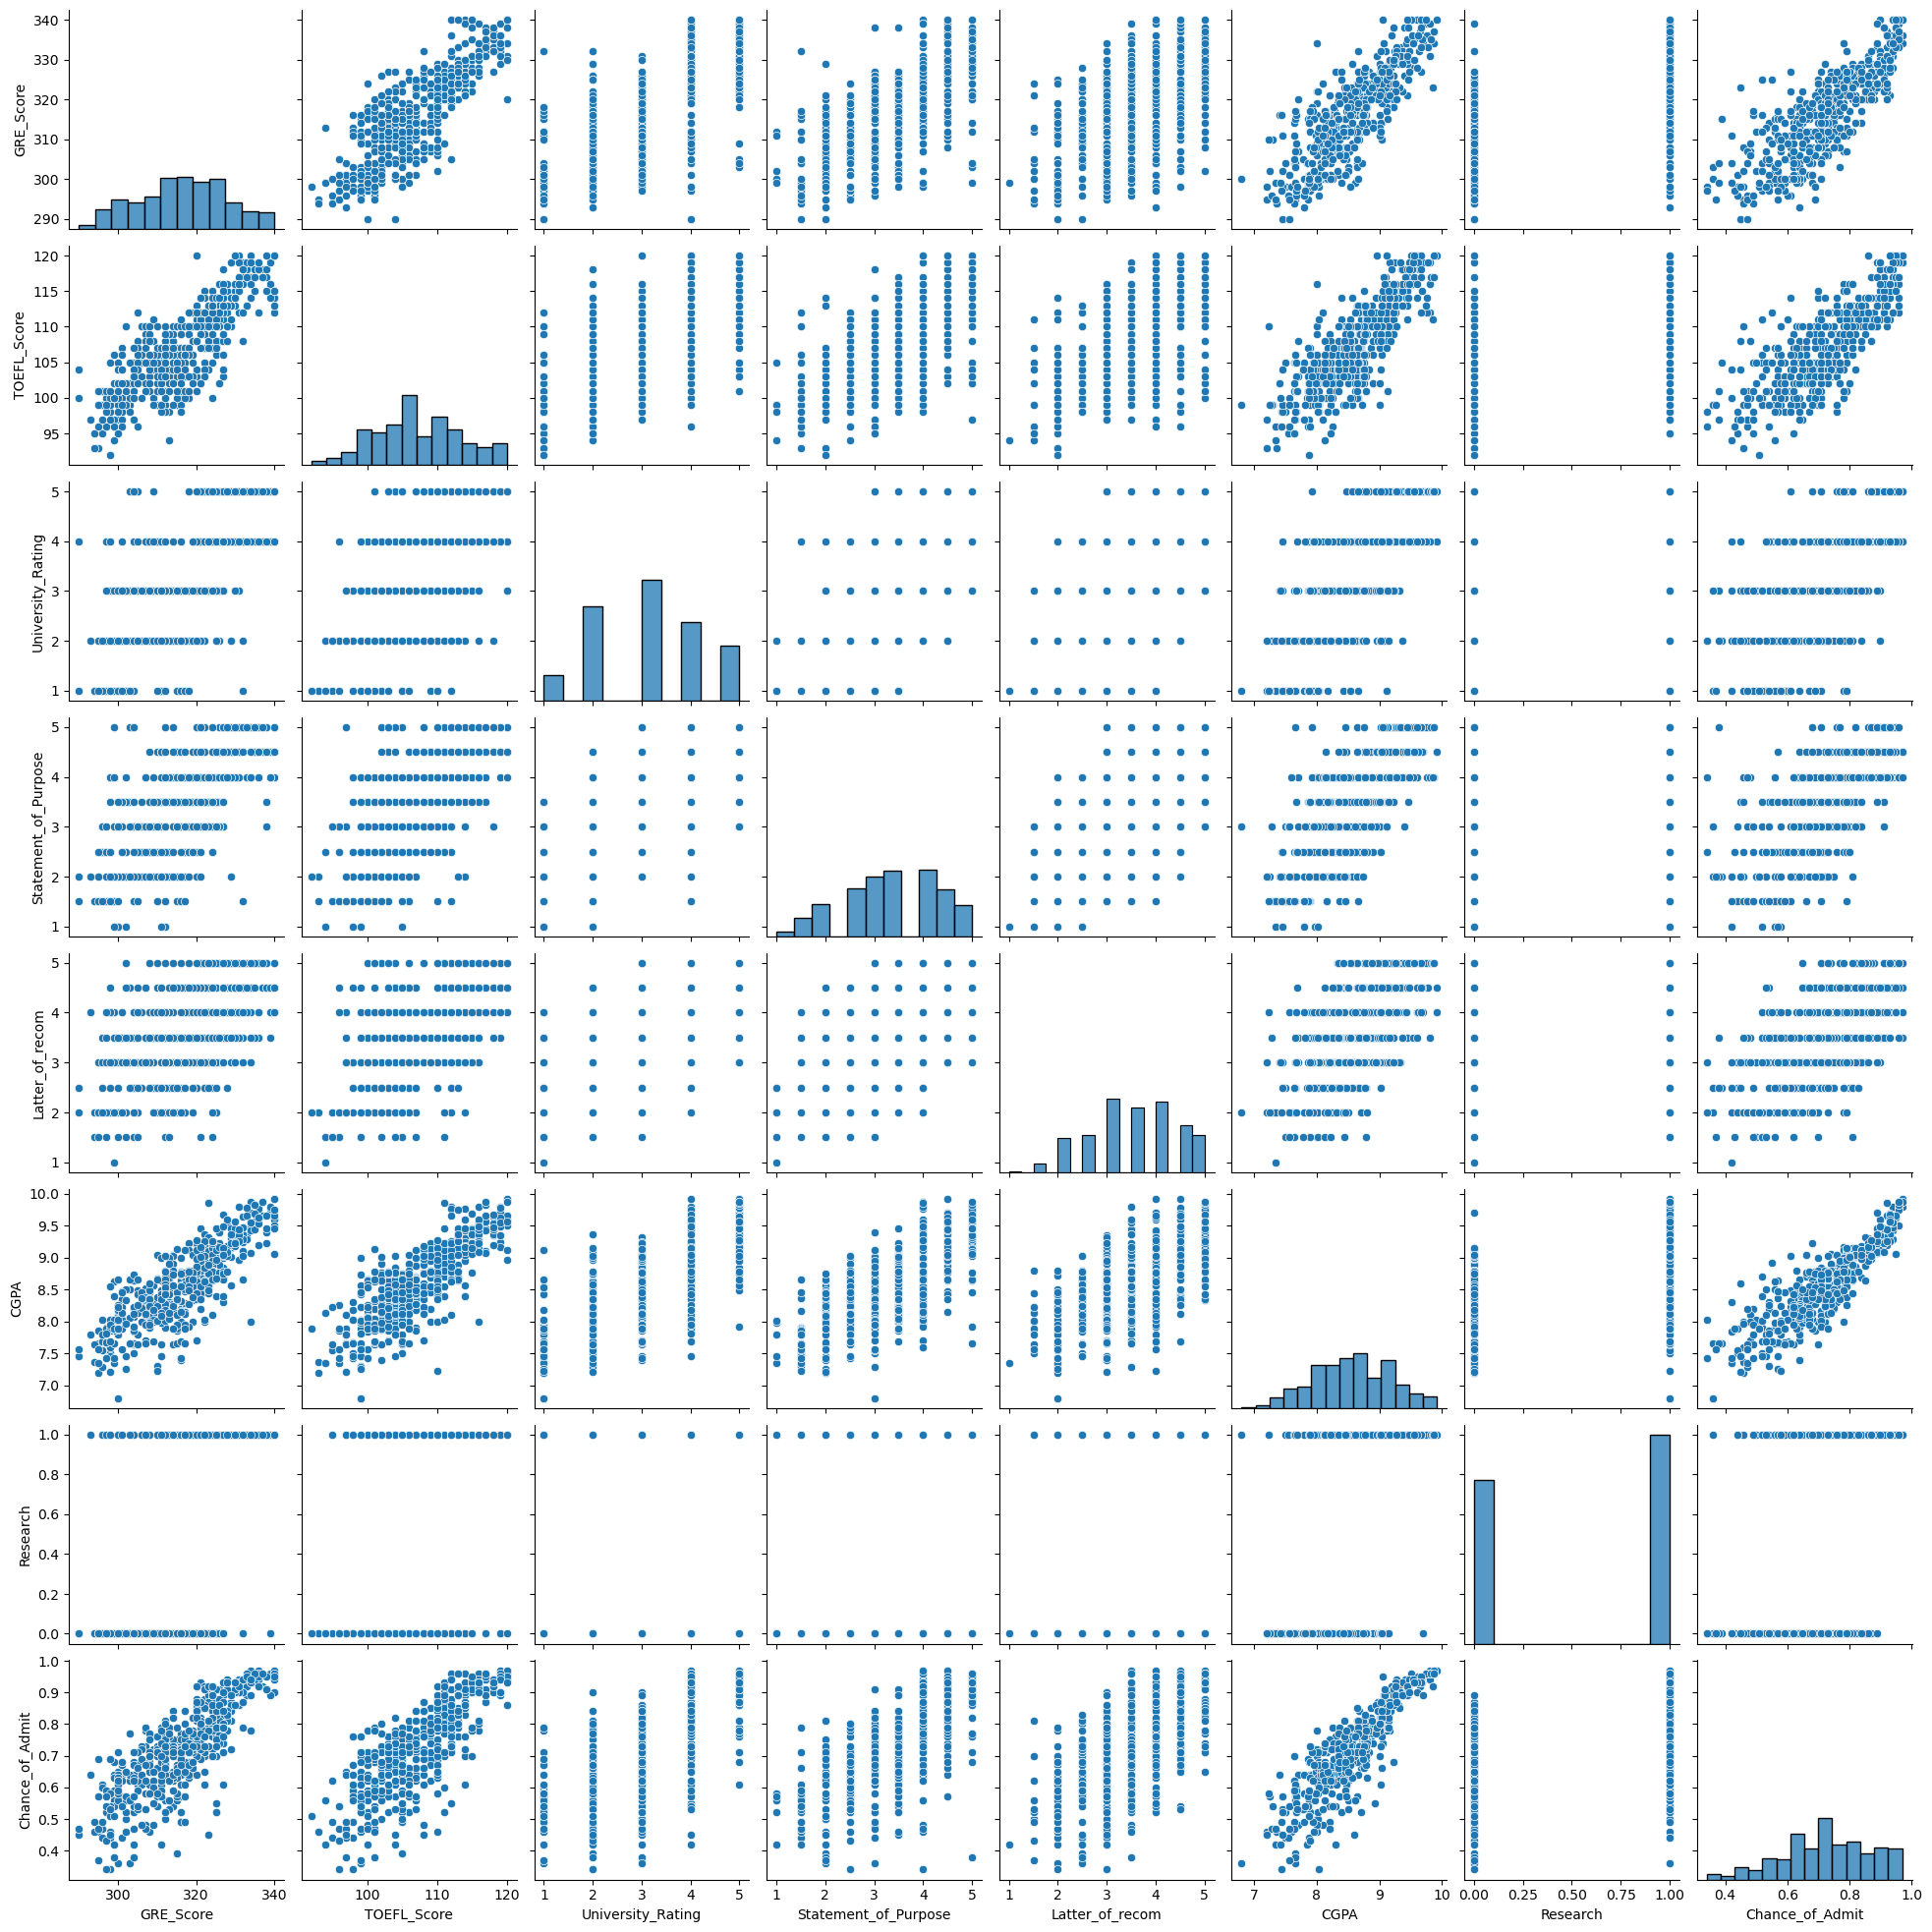

In [22]:
sn.pairplot(df)
pt.show()


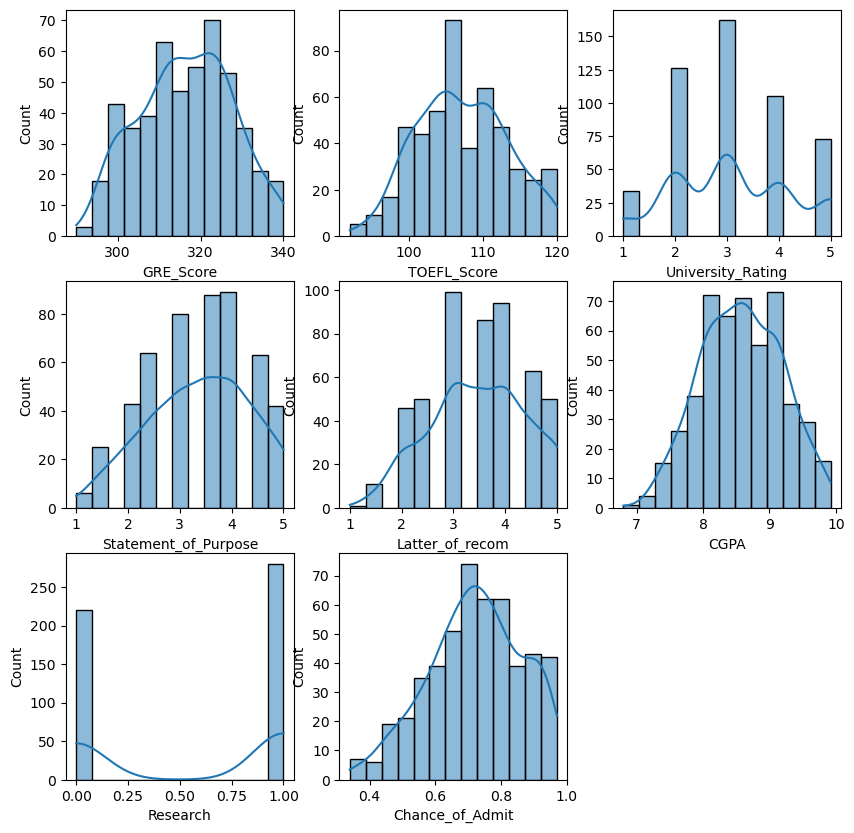

In [23]:
pt.figure(figsize=(10,10))
pt.subplot(3,3,1)
sn.histplot(df['GRE_Score'],bins=13,kde=True)
pt.subplot(3,3,2)
sn.histplot(df['TOEFL_Score'],bins=13,kde=True)
pt.subplot(3,3,3)
sn.histplot(df['University_Rating'],bins=13,kde=True)
pt.subplot(3,3,4)
sn.histplot(df['Statement_of_Purpose'],bins=13,kde=True)
pt.subplot(3,3,5)
sn.histplot(df['Latter_of_recom'],bins=13,kde=True)
pt.subplot(3,3,6)
sn.histplot(df['CGPA'],bins=13,kde=True)
pt.subplot(3,3,7)
sn.histplot(df['Research'],bins=13,kde=True)
pt.subplot(3,3,8)
sn.histplot(df['Chance_of_Admit'],bins=13,kde=True)
pt.show()

In [24]:
df.corr()

,GRE_Score,TOEFL_Score,University_Rating,Statement_of_Purpose,Latter_of_recom,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
Statement_of_Purpose,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
Latter_of_recom,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


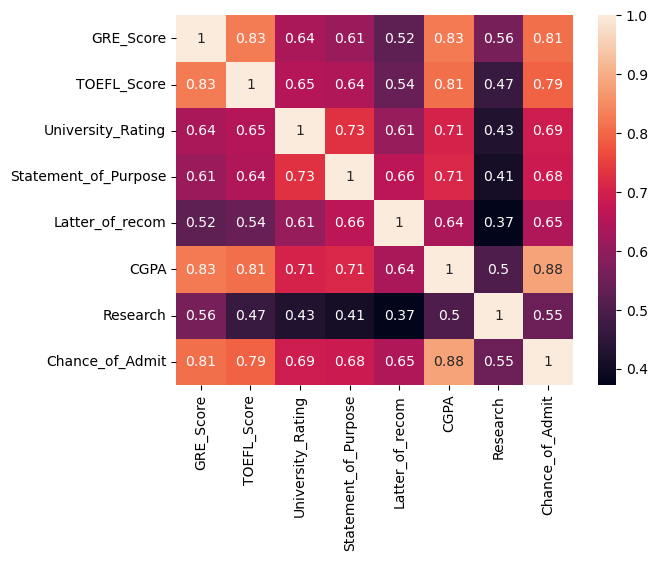

In [25]:
sn.heatmap(df.corr(), annot=True,cbar=True)
pt.show()

  no data cleaning


no data wranging

# model selection 

# multi  linear regression 

In [ ]:
# to split the data into  train and test 
X =df[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'Statement_of_Purpose','Latter_of_recom', 'CGPA', 'Research']]
y= df['Chance_of_Admit']
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.8,random_state=1)

# creating a model 
model= LinearRegression()
model.fit(X_train,y_train)
print('coefficient:',model.coef_)
print('intercept :',model.intercept_)

# to predict the output values
ypred_train = model.predict(X_train)


# calculating the rmse and r2 values by train data 
print("train rmse :",np.sqrt(mean_squared_error(y_train,ypred_train)))
print('train r2 score :',r2_score(y_train,ypred_train ))

# to validata test accuracy == cross validation 
print('cross validation :',cross_val_score(model,X,y,cv=5,scoring='r2').mean())


#to predict the test values 
ypred_test=model.predict(X_test)

# calculating the rmse and r2 values by test data
print("test rmse :",np.sqrt(mean_squared_error(y_test,ypred_test)))
print('test r2 score :',r2_score(y_test,ypred_test ))





In [ ]:
model1=smf.ols('y~ X',data=df).fit()
model1.summary()

In [ ]:
sm.graphics.plot_partregress_grid(model1)

In [ ]:
df.columns

# calculating vif(variable inflation factor )

In [ ]:
# calculated vif for indipendent variable


#vif for gre score
sqrt_GRE_Score= smf.ols("GRE_Score~TOEFL_Score+University_Rating+Statement_of_Purpose+Latter_of_recom+CGPA+Research",data=df).fit().rsquared
vif_GRE_Score=1/(1-sqrt_GRE_Score)

#vif for toefl score
sqrt_TOEFL_Score= smf.ols("TOEFL_Score~GRE_Score+University_Rating+Statement_of_Purpose+Latter_of_recom+CGPA+Research",data=df).fit().rsquared
vif_TOEFL_Score=1/(1-sqrt_TOEFL_Score)


#vif for University_Rating
sqrt_University_Rating= smf.ols("University_Rating~GRE_Score+TOEFL_Score+Statement_of_Purpose+Latter_of_recom+CGPA+Research",data=df).fit().rsquared
vif_University_Rating=1/(1-sqrt_University_Rating)


#vif for Statement_of_Purpose
sqrt_Statement_of_Purpose= smf.ols("Statement_of_Purpose~GRE_Score+TOEFL_Score+University_Rating+Latter_of_recom+CGPA+Research",data=df).fit().rsquared
vif_Statement_of_Purpose=1/(1-sqrt_Statement_of_Purpose)


#vif for Latter_of_recom
sqrt_Latter_of_recom= smf.ols("Latter_of_recom~GRE_Score+TOEFL_Score+University_Rating+Statement_of_Purpose+CGPA+Research",data=df).fit().rsquared
vif_Latter_of_recom=1/(1-sqrt_Latter_of_recom)

#vif for CGPA
sqrt_CGPA= smf.ols("CGPA~GRE_Score+TOEFL_Score+University_Rating+Statement_of_Purpose+Latter_of_recom+Research",data=df).fit().rsquared
vif_CGPA=1/(1-sqrt_CGPA)

#vif for Research
sqrt_Research= smf.ols("Research~GRE_Score+TOEFL_Score+University_Rating+Statement_of_Purpose+Latter_of_recom+CGPA",data=df).fit().rsquared
vif_Research=1/(1-sqrt_Research)



# storing the data to dataframe
vif_data={'Variable names':['GRE_Score',
                            'TOEFL_Score', 
                            'University_Rating', 
                            'Statement_of_Purpose',
                            'Latter_of_recom', 
                            'CGPA', 
                            'Research' ],
         'vif_values':[vif_GRE_Score,
                       vif_TOEFL_Score,
                       vif_University_Rating,
                       vif_Statement_of_Purpose,
                       vif_Latter_of_recom,
                       vif_CGPA,
                       vif_Research]}

vif_values=pd.DataFrame(vif_data)


In [ ]:
vif_values

In [ ]:
df=df.drop(['CGPA'],axis=1)

In [ ]:
# calculated vif for indipendent variable


#vif for gre score
sqrt_GRE_Score= smf.ols("GRE_Score~TOEFL_Score+University_Rating+Statement_of_Purpose+Latter_of_recom+Research+Chance_of_Admit",data=df).fit().rsquared
vif_GRE_Score=1/(1-sqrt_GRE_Score)



#vif for toefl score
sqrt_TOEFL_Score= smf.ols("TOEFL_Score~GRE_Score+University_Rating+Statement_of_Purpose+Latter_of_recom+Research+Chance_of_Admit",data=df).fit().rsquared
vif_TOEFL_Score=1/(1-sqrt_TOEFL_Score)


#vif for University_Rating
sqrt_University_Rating= smf.ols("University_Rating~GRE_Score+TOEFL_Score+Statement_of_Purpose+Latter_of_recom+Research+Chance_of_Admit",data=df).fit().rsquared
vif_University_Rating=1/(1-sqrt_University_Rating)


#vif for Statement_of_Purpose
sqrt_Statement_of_Purpose= smf.ols("Statement_of_Purpose~GRE_Score+TOEFL_Score+University_Rating+Latter_of_recom+Research+Chance_of_Admit",data=df).fit().rsquared
vif_Statement_of_Purpose=1/(1-sqrt_Statement_of_Purpose)


#vif for Latter_of_recom
sqrt_Latter_of_recom= smf.ols("Latter_of_recom~GRE_Score+TOEFL_Score+University_Rating+Statement_of_Purpose+Research+Chance_of_Admit",data=df).fit().rsquared
vif_Latter_of_recom=1/(1-sqrt_Latter_of_recom)


#vif for Research
sqrt_Research= smf.ols("Research~GRE_Score+TOEFL_Score+University_Rating+Statement_of_Purpose+Latter_of_recom+Chance_of_Admit",data=df).fit().rsquared
vif_Research=1/(1-sqrt_Research)



# storing the data to dataframe
vif_data={'Variable names':['GRE_Score',
                            'TOEFL_Score', 
                            'University_Rating', 
                            'Statement_of_Purpose',
                            'Latter_of_recom', 
                            'Research' ],
         'vif_values':[vif_GRE_Score,
                       vif_TOEFL_Score,
                       vif_University_Rating,
                       vif_Statement_of_Purpose,
                       vif_Latter_of_recom,
                       vif_Research]}

vif_values=pd.DataFrame(vif_data)


In [ ]:
vif_values

# again rebuild the model 

# multi linear regression 

In [ ]:
X =df[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'Statement_of_Purpose','Latter_of_recom', 'Research']]
y= df['Chance_of_Admit']
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.8,random_state=1)

# creating a model 
model= LinearRegression()
model.fit(X_train,y_train)
print('coefficient:',model.coef_)
print('intercept :',model.intercept_)

# to predict the output values
ypred_train = model.predict(X_train)


# calculating the rmse and r2 values by train data 
print("train rmse :",np.sqrt(mean_squared_error(y_train,ypred_train)))
print('train r2 score :',r2_score(y_train,ypred_train ))

# to validata test accuracy == cross validation 
print('cross validation :',cross_val_score(model,X,y,cv=5,scoring='r2').mean())


#to predict the test values 
ypred_test=model.predict(X_test)

# calculating the rmse and r2 values by test data
print("test rmse :",np.sqrt(mean_squared_error(y_test,ypred_test)))
print('test r2 score :',r2_score(y_test,ypred_test ))


# checking an assumptions 

In [ ]:
# checking linearity assumptions 

test_res= y_test-ypred_test
test_res

In [ ]:
# checking indipendent variable error 

pt.scatter(y_test,test_res)
pt.xlabel("observed values")
pt.ylabel("fitted values")
pt.show()

In [ ]:
# checking an normality assumption 

sn.histplot(test_res,bins=15,kde=True)
pt.show()

In [ ]:
# checking  equalerror assumptions

pt.scatter(ypred_test,test_res,color='blue')
pt.axhline(y=0,color="red")
pt.xlabel("residential values")
pt.ylabel("observed values")
pt.show()

# polynomial regression

In [ ]:
# polynomial regression 

poly_model=PolynomialFeatures(degree=2)
x_poly_train =pd.DataFrame(poly_model.fit_transform(X_train))

model.fit(x_poly_train,y_train)
print('coefficient : ',model.coef_)
print("intercept :",model.intercept_)

poly_ypred_train= model.predict(x_poly_train)

print("poly train rmse :",np.sqrt(mean_squared_error(y_train,poly_ypred_train)))
print("poly train r2 score :",r2_score(y_train,poly_ypred_train))

print(" poly cross validation :", cross_val_score(model,X,y,cv=5,scoring='r2').mean())

X_poly_test=pd.DataFrame(poly_model.transform(X_test))
poly_ypred_test=model.predict(X_poly_test)

print("poly test rmse :",np.sqrt(mean_squared_error(y_test,poly_ypred_test)))
print("poly test r2 score :",r2_score(y_test,poly_ypred_test))


# lasso regression 


In [ ]:
estimator= Lasso()
param_grid={"alpha":list(range(1,100))}
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
model_hp.fit(X_train,y_train)
model_hp.best_params_

In [ ]:
lasso_model=Lasso(alpha=1)
lasso_model.fit(X_train,y_train)
print("lasso coefficient :",lasso_model.coef_)
print("lasso intercept :",lasso_model.intercept_)

lasso_ypred_train=lasso_model.predict(X_train)

print("lasso train rmse :",np.sqrt(mean_squared_error(y_train,lasso_ypred_train)))
print("lasso train r2 score :",r2_score(y_train,lasso_ypred_train))

print("lasso cross validation :", cross_val_score(lasso_model,X_train,y_train,cv=5,scoring='r2').mean())

lasso_ypred_test=lasso_model.predict(X_test)
print("lasso test rmse :",np.sqrt(mean_squared_error(y_test,lasso_ypred_test)))
print("lasso test r2 score :",r2_score(y_test,lasso_ypred_test))


# ridge regression

In [ ]:
estimator=Ridge()
param_grid={"alpha":list(range(1,100))}
model_hp1= GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
model_hp1.fit(X_train, y_train)
model_hp1.best_params_

In [ ]:
ridge_model=Ridge(alpha=15)
ridge_model.fit(X_train,y_train)

print("ridge coefficient :",ridge_model.coef_)
print("ridge intercept :",ridge_model.intercept_)

ridge_ypred_train=ridge_model.predict(X_train)

print("ridge train rmse :",np.sqrt(mean_squared_error(y_train,ridge_ypred_train)))
print("ridge train r2 score :",r2_score(y_train,ridge_ypred_train))
print(" cross validation :",cross_val_score(ridge_model,X_train,y_train,cv=5,scoring='r2').mean())

ridge_ypred_test= ridge_model.predict(X_test)
print("ridge test rmse :",np.sqrt(mean_squared_error(y_test,ridge_ypred_test)))
print("ridge test r2 score :",r2_score(y_test,ridge_ypred_test))

# elastic net 

In [ ]:
# to calculate alpha and l1_ratio
estimator= ElasticNet()

param_grid={'alpha':[1,2,3,5,10],'l1_ratio':[0.1,0.5,0.75,0.9,0.95,1]}
model_hp2=GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
model_hp2.fit(X_train,y_train)
model_hp2.best_params_

In [ ]:
elastic_model=ElasticNet(alpha=1,l1_ratio=0.1)
elastic_model.fit(X_train,y_train)

print("ridge coefficient :",elastic_model.coef_)
print("ridge intercept :",elastic_model.intercept_)

elastic_ypred_train=elastic_model.predict(X_train)

print("ridge train rmse :",np.sqrt(mean_squared_error(y_train,elastic_ypred_train)))
print("ridge train r2 score :",r2_score(y_train,elastic_ypred_train))
print(" cross validation :",cross_val_score(elastic_model,X_train,y_train,cv=5,scoring='r2').mean())

elastic_ypred_test= ridge_model.predict(X_test)
print("ridge test rmse :",np.sqrt(mean_squared_error(y_test,elastic_ypred_test)))
print("ridge test r2 score :",r2_score(y_test,elastic_ypred_test))

# final model 


In [ ]:
final_model= LinearRegression()
final_model.fit(X_train,y_train)
print('coefficient:',final_model.coef_)
print('intercept :',final_model.intercept_)

# to predict the output values
final_ypred_train = final_model.predict(X_train)


# calculating the rmse and r2 values by train data 
print("train rmse :",np.sqrt(mean_squared_error(y_train,final_ypred_train)))
print('train r2 score :',r2_score(y_train,final_ypred_train ))

# to validata test accuracy == cross validation 
print('cross validation :',cross_val_score(final_model,X,y,cv=5,scoring='r2').mean())


#to predict the test values 
final_ypred_test=final_model.predict(X_test)

# calculating the rmse and r2 values by test data
print("test rmse :",np.sqrt(mean_squared_error(y_test,final_ypred_test)))
print('test r2 score :',r2_score(y_test,final_ypred_test ))


# predict unknown data 

In [ ]:
input_data={'GRE_Score':320,
            'TOEFL_Score':110,
            'University_Rating':5,
            'Statement_of_Purpose':4.5,
            'Latter_of_recom':3.5,  
            'Research':1}

In [ ]:
test=pd.DataFrame(input_data,index=[0])

In [ ]:
final_model.predict(test)